In [1]:
import numpy as np
import os
import math
import random
import torch
# from torch.utils.tensorboard import SummaryWriter
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy import stats
import plotly.graph_objects as go

from sklearn.utils import shuffle
import torch.nn as nn
!pip install torchsummary
import matplotlib.pyplot as plt
from torchsummary import summary
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

Looking in indexes: https://pypi.doubanio.com/simple


In [2]:
import numpy as np
import seaborn
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam
from torchvision import datasets, transforms

USE_CUDA = True

In [3]:
dataset = pd.read_csv('../capsule_code/data.csv')
dataset

,Unnamed: 0,0,1,2,3,4,5,6,label
0,0,-1.301023,-1.651728,-1.538896,-1.562533,-0.329070,0.350222,-0.391974,11
1,1,-1.301023,-1.651728,-1.538896,-1.562533,-0.329070,0.350222,-0.391974,11
2,2,-1.301023,-1.651728,-1.538896,-1.562533,-0.329070,0.350222,-0.391974,11
3,3,-1.301023,-1.651728,-1.538896,-1.562533,-0.329070,0.350222,-0.391974,11
4,4,-1.301023,-1.651728,-1.538896,-1.275513,-0.329070,0.348971,-0.428100,11
...,...,...,...,...,...,...,...,...,...
11995,11995,1.181845,1.620713,1.450329,1.594679,-0.368392,-0.005276,-0.428100,14
11996,11996,1.181845,1.620713,1.586202,-1.562533,-0.368392,-0.004337,-0.428100,0
11997,11997,1.181845,1.620713,1.586202,-1.275513,-0.368392,-0.004963,-0.428100,0
11998,11998,1.181845,1.620713,1.586202,0.159583,-0.368392,-0.005901,-0.428100,0


# 1.数据集划分

## 1.1将时间序列划分为月、天、小时、分 

In [4]:
dataset['date'] = pd.to_datetime(dataset['date'], errors='coerce')
#月
dataset['month'] = dataset['date'].dt.month
#天
dataset['day'] = dataset['date'].dt.day
#小时
dataset['hour'] = dataset['date'].dt.hour
#分
dataset['minute'] = dataset['date'].dt.minute

KeyError: 'date'

## 1.2 标准化时间序列 

In [4]:
# 标准化
info_data = dataset[['month', 'day', 'hour', 'minute', 'UserCpu使用率', '内存负载', '主机CPU平均负载']]
min_max_scaler = preprocessing.StandardScaler()
# preprocessing.MinMaxScaler可以把属性缩放到最大值最小值之间
np_scaled = min_max_scaler.fit_transform(info_data)
info_data = pd.DataFrame(np_scaled)
# info_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# info_data = np.nan_to_num(info_data)
info_data

KeyError: "None of [Index(['month', 'day', 'hour', 'minute', 'UserCpu使用率', '内存负载', '主机CPU平均负载'], dtype='object')] are in the [columns]"

## 1.3 划分数据集

In [17]:
info_data['label'] = dataset['label']

In [4]:
all_data = shuffle(dataset)

In [5]:
all_data

,Unnamed: 0,0,1,2,3,4,5,6,label
8939,8939,1.181845,-0.888159,1.450329,1.594679,-0.329070,0.603077,-0.428100,0
5597,5597,-0.059589,-0.124589,1.042707,-1.275513,3.131272,-2.126059,-0.355848,9
4591,4591,-0.059589,-0.888159,-0.995400,0.446602,-0.368392,0.454431,-0.428100,0
953,953,-1.301023,-0.888159,1.450329,1.307660,-0.289748,0.332385,-0.355848,11
4994,4994,-0.059589,-0.669996,1.586202,0.159583,-0.368392,-2.214620,-0.500352,3
...,...,...,...,...,...,...,...,...,...
5159,5159,-0.059589,-0.451833,-1.131274,0.446602,-0.289748,0.336140,-0.391974,0
4300,4300,-0.059589,-1.215403,0.363338,-1.562533,-0.250426,0.486663,-0.283596,0
461,461,-1.301023,-1.324484,1.042707,0.159583,-0.289748,0.333011,-0.355848,0
6302,6302,-0.059589,0.529899,0.770959,0.446602,-0.171782,0.611526,-0.175218,12


In [6]:
data = all_data[['0','1','2','3','4','5','6']]
label = all_data['label']

In [7]:
label

8939      0
5597      9
4591      0
953      11
4994      3
         ..
5159      0
4300      0
461       0
6302     12
10024    15
Name: label, Length: 12000, dtype: int64

In [8]:
data.shape

(12000, 7)

In [9]:
label.shape

(12000,)

In [10]:
label.sum() / len(label)

4.0

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [12]:
X_train.shape

(7200, 7)

In [13]:
X_train, X_test, X_valid = np.array(X_train).reshape(-1, 7), np.array(X_test).reshape(-1, 7), np.array(X_valid).reshape(-1, 7)
y_train, y_test, y_valid = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1), np.array(y_valid).reshape(-1, 1)

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train, X_valid, X_test = torch.FloatTensor(X_train), torch.FloatTensor(X_valid), torch.FloatTensor(X_test)
y_train, y_valid, y_test = torch.FloatTensor(y_train), torch.FloatTensor(y_valid), torch.FloatTensor(y_test)

## 1.4 设置数据加载器 

In [15]:
from torch.utils.data import Dataset, DataLoader

class Dataset(Dataset):
  # 'Characterizes a dataset for PyTorch'
    def __init__(self, data, labels):
        # 'Initialization'
        self.labels = labels
        self.data = data

    def __len__(self):
        # 'Denotes the total number of samples'
        return len(self.data)

    def __getitem__(self, index):
        # 'Generates one sample of data'
        # Select sample
        return self.data[index], self.labels[index]

In [18]:
train_set = Dataset(X_train, y_train)
train_loader = DataLoader(
    train_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

validation_set = Dataset(X_valid, y_valid)
validation_loader = DataLoader(
    validation_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

test_set = Dataset(X_test, y_test)
test_loader = DataLoader(
    test_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

In [19]:
config = {
    'batch_size': 100,
    'shuffle': True,
    'drop_last': False
}

# 2.异常分类模型 

## 胶囊网络 

## 2.1 卷积层 

In [20]:
class ConvLayer(nn.Module):
    
    def __init__(self, in_channels=7, out_channels=64):
        '''Constructs the ConvLayer with a specified input and output size.
           param in_channels: input depth of an image, default value = 1
           param out_channels: output depth of the convolutional layer, default value = 256
           '''
        super(ConvLayer, self).__init__()

        # defining a convolutional layer of the specified size
        self.conv1 = nn.Conv1d(in_channels=7, out_channels=64, 
                              kernel_size=2, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=32, 
                              kernel_size=2, stride=1, padding=1)
#         self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        '''Defines the feedforward behavior.
           param x: the input to the layer; an input image
           return: a relu-activated, convolutional layer
           '''
        # 将 ReLu 激活应用于 conv 层的输出
        features = self.conv1(x)
        features = self.conv2(features)
        features = F.relu(features) # will have dimensions (batch_size, 20, 20, 256)
        return features
    

In [21]:
cnn = ConvLayer()
for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
    batch_data = batch_data.unsqueeze(0)
    batch_data = batch_data.permute(1,2,0)
    output = cnn(batch_data)
    

In [22]:
batch_data.shape, batch_labels.shape

(torch.Size([100, 7, 1]), torch.Size([100, 1]))

In [23]:
output.shape, output

(torch.Size([100, 32, 3]),
 tensor([[[0.1884, 0.0000, 0.1905],
          [0.1175, 0.0752, 0.1236],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0273, 0.0000, 0.0000],
          [0.1084, 0.0896, 0.1970],
          [0.0000, 0.0110, 0.0070]],
 
         [[0.0039, 0.0000, 0.4296],
          [0.3597, 0.0270, 0.4151],
          [0.0621, 0.0123, 0.0000],
          ...,
          [0.3371, 0.0000, 0.0000],
          [0.0000, 0.1239, 0.0957],
          [0.1951, 0.0591, 0.1220]],
 
         [[0.1558, 0.3360, 0.1393],
          [0.0000, 0.2655, 0.0000],
          [0.0000, 0.2526, 0.0364],
          ...,
          [0.0000, 0.0537, 0.0635],
          [0.0874, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],
 
         ...,
 
         [[0.0000, 0.0000, 0.2062],
          [0.0994, 0.1455, 0.0734],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0244, 0.0000, 0.0613],
          [0.0000, 0.2014, 0.0000],
          [0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.

## 2.2 子胶囊层

In [26]:
class PrimaryCaps(nn.Module):
    
    def __init__(self, num_capsules=4, in_channels=32, out_channels=16):
        '''Constructs a list of convolutional layers to be used in 
           creating capsule output vectors.
           param num_capsules: number of capsules to create
           param in_channels: input depth of features, default value = 256
           param out_channels: output depth of the convolutional layers, default value = 32
           '''
        super(PrimaryCaps, self).__init__()

        # creating a list of convolutional layers for each capsule I want to create
        # all capsules have a conv layer with the same parameters
        # num_capsules = 8
        # [batch, 20, 20, 256]-->[batch, 20, 20, 32]*8
        # 将256个特征变成8个特征，即8个胶囊
        self.capsules = nn.ModuleList([
            nn.Conv1d(in_channels=in_channels, out_channels=out_channels, 
                      kernel_size=2, stride=1, padding=1)
            for _ in range(num_capsules)])
    
    def forward(self, x):
        '''Defines the feedforward behavior.
           param x: the input; features from a convolutional layer
           return: a set of normalized, capsule output vectors
           '''
        # get batch size of inputs
        batch_size = x.size(0)
        # reshape convolutional layer outputs to be (batch_size, vector_dim=1152, 1)
        # (batch_size, vector_dim=1152, 1)
        # 将每一个胶囊打平成一个矩阵，一共就有8个(batch, 1152, 1)
        u = [capsule(x).view(batch_size, 64 , 1) for capsule in self.capsules]
        # 堆叠输出向量 u，每个胶囊一个
        u = torch.cat(u, dim=-1)
        # 压缩向量堆栈
        u_squash = self.squash(u)
        return u_squash
    
    # 将每个胶囊的输出限制在[0, 1]，即为眼睛或者鼻子的概率
    def squash(self, input_tensor):
        '''Squashes an input Tensor so it has a magnitude between 0-1.
           param input_tensor: a stack of capsule inputs, s_j
           return: a stack of normalized, capsule output vectors, v_j
           '''
        squared_norm = (input_tensor ** 2).sum(dim=-1, keepdim=True)
        scale = squared_norm / (1 + squared_norm) # normalization coeff
        output_tensor = scale * input_tensor / torch.sqrt(squared_norm)    
        return output_tensor

In [27]:
cnn = ConvLayer()
primaryCaps = PrimaryCaps()
for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
    batch_data = batch_data.unsqueeze(0)
    batch_data = batch_data.permute(1,2,0)
    cnn_output = cnn(batch_data)
    primaryCaps_output = primaryCaps(cnn_output)

In [28]:
primaryCaps_output.shape, primaryCaps_output

(torch.Size([100, 64, 4]),
 tensor([[[ 2.4228e-03,  1.1583e-03,  3.1078e-03, -1.0338e-02],
          [ 2.6171e-02, -7.7814e-03,  1.0022e-03,  9.3404e-05],
          [ 4.9218e-02, -1.5136e-02,  6.8820e-04, -7.8286e-03],
          ...,
          [-1.4644e-02, -3.7032e-02,  9.7122e-03,  1.0314e-02],
          [-3.4919e-02, -5.3818e-02,  1.4257e-03, -4.1529e-04],
          [-1.7884e-02, -3.1263e-02, -7.3433e-03,  1.0567e-02]],
 
         [[ 1.8359e-02, -1.3381e-02, -7.6470e-03, -4.8897e-03],
          [ 6.5808e-02, -3.5080e-02,  1.7290e-02,  1.2838e-02],
          [ 3.8721e-02, -6.8634e-03, -1.1389e-02, -1.0721e-02],
          ...,
          [ 1.1018e-02, -6.5023e-02,  2.1196e-02,  1.8762e-02],
          [-7.8264e-02, -7.3407e-02, -3.5680e-02, -2.4208e-02],
          [-1.1381e-02, -1.3951e-02, -1.3922e-02, -8.4910e-03]],
 
         [[ 8.2300e-04,  1.2852e-03, -2.0134e-03, -4.0454e-04],
          [ 6.4751e-03,  1.2075e-02,  1.6546e-02,  1.5015e-02],
          [ 1.5785e-02, -1.4966e-02,  3.4

## 2.3 动态路由 

In [25]:
import helpers # to get transpose softmax function

# dynamic routing
def dynamic_routing(b_ij, u_hat, squash, routing_iterations=3):
    '''Performs dynamic routing between two capsule layers.
       param b_ij: initial log probabilities that capsule i should be coupled to capsule j
       param u_hat: input, weighted capsule vectors, W u
       param squash: given, normalizing squash function
       param routing_iterations: number of times to update coupling coefficients
       return: v_j, output capsule vectors
       '''    
    # update b_ij, c_ij for number of routing iterations
    for iteration in range(routing_iterations):
        # softmax calculation of coupling coefficients, c_ij
        # c_ij: torch.Size([10, 20, 1152, 1, 16])
        c_ij = helpers.softmax(b_ij, dim=2)

        # calculating total capsule inputs, s_j = sum(c_ij*u_hat)
        
        # s_j: torch.Size([10, 20, 1, 1, 16])
        s_j = (c_ij * u_hat).sum(dim=2, keepdim=True)

        # squashing to get a normalized vector output, v_j
        # v_j: torch.Size([10, 20, 1, 1, 16])
        v_j = squash(s_j)

        # if not on the last iteration, calculate agreement and new b_ij
        if iteration < routing_iterations - 1:
            # agreement
            a_ij = (u_hat * v_j).sum(dim=-1, keepdim=True)
            
            # new b_ij
            b_ij = b_ij + a_ij
    
    return v_j # return latest v_j

## 2.4 父胶囊层

In [26]:
class DigitCaps(nn.Module):
    
    def __init__(self, num_capsules=16, previous_layer_nodes=64, 
                 in_channels=4, out_channels=8):
        '''Constructs an initial weight matrix, W, and sets class variables.
           param num_capsules: number of capsules to create
           param previous_layer_nodes: dimension of input capsule vector, default value = 1152
           param in_channels: number of capsules in previous layer, default value = 8
           param out_channels: dimensions of output capsule vector, default value = 16
           '''
        super(DigitCaps, self).__init__()

        # setting class variables
        self.num_capsules = num_capsules
        self.previous_layer_nodes = previous_layer_nodes # vector input (dim=1152)
        self.in_channels = in_channels # previous layer's number of capsules

        # starting out with a randomly initialized weight matrix, W
        # these will be the weights connecting the PrimaryCaps and DigitCaps layers
        self.W = nn.Parameter(torch.randn(num_capsules, previous_layer_nodes, 
                                          in_channels, out_channels))

    def forward(self, u):
        '''Defines the feedforward behavior.
           param u: the input; vectors from the previous PrimaryCaps layer
           return: a set of normalized, capsule output vectors
           '''
        
        # adding batch_size dims and stacking all u vectors
        # u 为上一层的输出
        # u: torch.Size([1, 20, 1152, 1, 8])
        u = u[None, :, :, None, :]
        
        # 4D weight matrix
        # W: torch.Size([10, 1, 1152, 8, 16])
        W = self.W[:, None, :, :, :]
        
        # calculating u_hat = W*u
        # u_hat: torch.Size([10, 20, 1152, 1, 16])
        u_hat = torch.matmul(u, W)

        # getting the correct size of b_ij
        # setting them all to 0, initially
        # b_ij初始化都为0
        # b_ij: torch.Size([10, 20, 1152, 1, 16])
        b_ij = torch.zeros(*u_hat.size())
        
#         # moving b_ij to GPU, if available
#         if TRAIN_ON_GPU:
#             b_ij = b_ij.cuda()

        # update coupling coefficients and calculate v_j
        v_j = dynamic_routing(b_ij, u_hat, self.squash, routing_iterations=3)

        return v_j # return final vector outputs
    
    
    def squash(self, input_tensor):
        '''Squashes an input Tensor so it has a magnitude between 0-1.
           param input_tensor: a stack of capsule inputs, s_j
           return: a stack of normalized, capsule output vectors, v_j
           '''
        # same squash function as before
        squared_norm = (input_tensor ** 2).sum(dim=-1, keepdim=True)
        scale = squared_norm / (1 + squared_norm) # normalization coeff
        output_tensor = scale * input_tensor / torch.sqrt(squared_norm)    
        return output_tensor

In [27]:
cnn = ConvLayer()
primaryCaps = PrimaryCaps()
digitCaps = DigitCaps()
for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
    batch_data = batch_data.unsqueeze(0)
    batch_data = batch_data.permute(1,2,0)
    cnn_output = cnn(batch_data)
    primaryCaps_output = primaryCaps(cnn_output)
    digitCaps_output = digitCaps(primaryCaps_output)

In [28]:
cnn_output.shape, primaryCaps_output.shape, digitCaps_output.shape

(torch.Size([100, 32, 3]),
 torch.Size([100, 64, 4]),
 torch.Size([16, 100, 1, 1, 8]))

## 2.5 全连接层 

In [60]:
class Decoder(nn.Module):
    
    def __init__(self, input_vector_length=8, input_capsules=16, hidden_dim=512):
        '''Constructs an series of linear layers + activations.
           param input_vector_length: dimension of input capsule vector, default value = 16
           param input_capsules: number of capsules in previous layer, default value = 10
           param hidden_dim: dimensions of hidden layers, default value = 512
           '''
        super(Decoder, self).__init__()
        
        # calculate input_dim
        # 16*8=128
        input_dim = input_vector_length * input_capsules
        print("input_dim:", input_dim)
        
        # define linear layers + activations
        self.linear_layers = nn.Sequential(
            # (160, 512)
            nn.Linear(input_dim, hidden_dim), # first hidden layer
            nn.ReLU(inplace=True),
            # (512, 1024)
            nn.Linear(hidden_dim, hidden_dim*2), # second, twice as deep
            nn.ReLU(inplace=True),
            nn.Linear(hidden_dim*2, 7*1), # can be reshaped into 28*28 image
            nn.Sigmoid() # sigmoid activation to get output pixel values in a range from 0-1
            )
        
    def forward(self, x):
        '''Defines the feedforward behavior.
           param x: the input; vectors from the previous DigitCaps layer
           return: two things, reconstructed images and the class scores, y
           '''
        # classes: torch.Size([100, 16])
        classes = (x ** 2).sum(dim=-1) ** 0.5
        classes = F.softmax(classes, dim=-1) 
        
        # find the capsule with the maximum vector length
        # here, vector length indicates the probability of a class' existence
        _, max_length_indices = classes.max(dim=1)
        
        # create a sparse class matrix
        # sparse_matrix: torch.Size([10, 10])
        sparse_matrix = torch.eye(16) # 10 is the number of classes
        print("sparse_matrix:", sparse_matrix)
        
#         if TRAIN_ON_GPU:
#             sparse_matrix = sparse_matrix.cuda()
        # get the class scores from the "correct" capsule
    # y: torch.Size([20, 10])
        y = sparse_matrix.index_select(dim=0, index=max_length_indices.data)
        print("y:", y)
        
        # create reconstructed pixels
        # x: torch.Size([20, 10, 16])
        x = x * y[:, :, None]
        
        # flatten image into a vector shape (batch_size, vector_dim)
        # flattened_x: torch.Size([20, 160])
        flattened_x = x.contiguous().view(x.size(0), -1)
        
        # create reconstructed image vectors
        # reconstructions: torch.Size([20, 784])
        reconstructions = self.linear_layers(flattened_x)
        
        # return reconstructions and the class scores, y
        return reconstructions, y

In [61]:
cnn = ConvLayer()
primaryCaps = PrimaryCaps()
digitCaps = DigitCaps()
decoder = Decoder()
for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
    batch_data = batch_data.unsqueeze(0)
    batch_data = batch_data.permute(1,2,0)
    cnn_output = cnn(batch_data)
    primaryCaps_output = primaryCaps(cnn_output)
    digitCaps_output = digitCaps(primaryCaps_output).squeeze().transpose(0,1)
    reconstructions, y = decoder(digitCaps_output)

input_dim: 128
sparse_matrix: tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        

In [62]:
cnn_output.shape, primaryCaps_output.shape, digitCaps_output.shape, reconstructions.shape, y.shape

(torch.Size([100, 32, 3]),
 torch.Size([100, 64, 4]),
 torch.Size([100, 16, 8]),
 torch.Size([100, 7]),
 torch.Size([100, 16]))

In [63]:
reconstructions, y 

(tensor([[0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.4932],
         [0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.4932],
         [0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.4932],
         [0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.4932],
         [0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.4932],
         [0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.4932],
         [0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.4932],
         [0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.4932],
         [0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.4932],
         [0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.4932],
         [0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.4932],
         [0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.4932],
         [0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.4932],
         [0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.4932],
         [0.5019, 0.4977, 0.4961, 0.5068, 0.4962, 0.4954, 0.49

## 2.6 整个网络结构

In [33]:
class CapsuleNetwork(nn.Module):
    
    def __init__(self):
        '''Constructs a complete Capsule Network.'''
        super(CapsuleNetwork, self).__init__()
        self.conv_layer = ConvLayer()
        self.primary_capsules = PrimaryCaps()
        self.digit_capsules = DigitCaps()
        self.decoder = Decoder()
                
    def forward(self, images):
        '''Defines the feedforward behavior.
           param images: the original MNIST image input data
           return: output of DigitCaps layer, reconstructed images, class scores
           '''
        primary_caps_output = self.primary_capsules(self.conv_layer(images))
        caps_output = self.digit_capsules(primary_caps_output).squeeze().transpose(0,1)
        reconstructions, y = self.decoder(caps_output)
        return caps_output, reconstructions, y

In [34]:
capsule_net = CapsuleNetwork()

print(capsule_net)

input_dim: 128
CapsuleNetwork(
  (conv_layer): ConvLayer(
    (conv1): Conv1d(7, 64, kernel_size=(2,), stride=(1,), padding=(1,))
    (conv2): Conv1d(64, 32, kernel_size=(2,), stride=(1,), padding=(1,))
  )
  (primary_capsules): PrimaryCaps(
    (capsules): ModuleList(
      (0): Conv1d(32, 16, kernel_size=(2,), stride=(1,), padding=(1,))
      (1): Conv1d(32, 16, kernel_size=(2,), stride=(1,), padding=(1,))
      (2): Conv1d(32, 16, kernel_size=(2,), stride=(1,), padding=(1,))
      (3): Conv1d(32, 16, kernel_size=(2,), stride=(1,), padding=(1,))
    )
  )
  (digit_capsules): DigitCaps()
  (decoder): Decoder(
    (linear_layers): Sequential(
      (0): Linear(in_features=128, out_features=512, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=512, out_features=1024, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=1024, out_features=7, bias=True)
      (5): Sigmoid()
    )
  )
)


## 2.7 Custom Loss

Loss = MSE + 重构损失

In [35]:
class CapsuleLoss(nn.Module):
    
    def __init__(self):
        '''Constructs a CapsuleLoss module.'''
        super(CapsuleLoss, self).__init__()
        self.reconstruction_loss = nn.MSELoss(reduction='sum') # cumulative loss, equiv to size_average=False

    # 重构损失
    def forward(self, x, labels, train_x, reconstructions):
        '''Defines how the loss compares inputs.
           param x: digit capsule outputs
           param labels: 
           param images: the original MNIST image input data
           param reconstructions: reconstructed MNIST image data
           return: weighted margin and reconstruction loss, averaged over a batch
           '''
        batch_size = x.size(0)

        ##  calculate the margin loss   ##
        
        # get magnitude of digit capsule vectors, v_c
        v_c = torch.sqrt((x**2).sum(dim=2, keepdim=True))

        # calculate "correct" and incorrect loss
        # 计算正确的损失
        left = F.relu(0.9 - v_c).view(batch_size, -1)
        # 计算不正确的损失
        right = F.relu(v_c - 0.1).view(batch_size, -1)
        
        # sum the losses, with a lambda = 0.5
        margin_loss = labels * left + 0.5 * (1. - labels) * right
        margin_loss = margin_loss.sum()

        ##  calculate the reconstruction loss   ##
        train_x = train_x.view(reconstructions.size()[0], -1)
        reconstruction_loss = self.reconstruction_loss(reconstructions, train_x)

        # return a weighted, summed loss, averaged over a batch size
        return (margin_loss + 0.0005 * reconstruction_loss) / train_x.size(0)

## Specify Loss Function and [Optimizer](http://pytorch.org/docs/stable/optim.html)

In [36]:
import torch.optim as optim

# custom loss
criterion = CapsuleLoss()

# Adam optimizer with default params
optimizer = optim.Adam(capsule_net.parameters(), lr=0.0001)

In [37]:
len(train_loader)

72

## 训练网络

In [38]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
def One_hot(labels):
    num_class=16
    lb=LabelBinarizer().fit(np.array(range(num_class)))
    labels=lb.transform(labels)
    return labels

In [39]:
def evalute_ty(predict_y,real_y,threshold_range=[0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999]):
    '''自定义模型评估方法
        评估不同阈值下模型的性能，将打印各阈值下的判黑个数/precision/recall/f1/auc值
    Args:
        predict_y：预测得分
        real_y ：真实标签
        threshold_range ：阈值列表
    '''
    for threshold in threshold_range:
        final_predict = (predict_y >= threshold).astype("int32")
        temp=pd.DataFrame(final_predict,columns=["result"])
        temp.index=range(len(uins))
        compare=pd.concat([real_y,temp],axis=1)
        compare.columns=["real","predict",]
        blacknum=len(compare[compare.predict==1].uin.drop_duplicates())
        if blacknum==0:
            print("continue")
            continue
        acc=round(accuracy_score(real_y, final_predict),3) # 正确率：被分对的样本数除以所有的样本数
        precision=round(precision_score(real_y, final_predict,average='binary'),3)#准确率：预测为正的样本中实际为正的比例
        recall=round(recall_score(real_y, final_predict,average='binary'),3)#召回率：所有正样本中预测为正的比例
        f1=round(f1_score(real_y, final_predict,average='binary'),3)
        auc=round(roc_auc_score(real_y, predict),3)
        print('threshold: {}:predictblack {},acc {},precision {},recall {},f1 {},auc {}'.format(threshold,blacknum,acc,precision,recall,f1,auc))

In [56]:
def train(capsule_net, criterion, optimizer, 
          n_epochs, print_every=len(train_loader)):
    '''Trains a capsule network and prints out training batch loss statistics.
       Saves model parameters if *validation* loss has decreased.
       param capsule_net: trained capsule network
       param criterion: capsule loss function
       param optimizer: optimizer for updating network weights
       param n_epochs: number of epochs to train for
       param print_every: batches to print and save training loss, default = 100
       return: list of recorded training losses
       '''

    # track training loss over time
    losses = []
    
    # one epoch = one pass over all training data 
    for epoch in range(1, n_epochs+1):

        # initialize training loss
        train_loss = 0.0
        train_acc = 0.0
        train_accs = []
        avg_train_loss = 0.0
        capsule_net.train() # set to train mode
        train_preds = []
        train_trues = []
        # get batches of training image data and targets
        for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
            
#             print("batch_labels:", batch_labels)
            batch_data = batch_data.unsqueeze(0)
            batch_data = batch_data.permute(1,2,0)
            batch_labels = batch_labels.squeeze()
            batch_labels = One_hot(batch_labels)
            print("batch_labels:", batch_labels)
            # 转tensor，batch_labels: torch.Size([32, 16])
            batch_labels = torch.from_numpy(batch_labels) 
            print("batch_labels:", batch_labels)
            
            # zero out gradients
            optimizer.zero_grad()
            # get model outputs
            caps_output, reconstructions, y = capsule_net(batch_data)
            print("shape:", caps_output.shape)
            print("caps_output:", caps_output)
            print("y:", y)
            # calculate loss
            loss = criterion(caps_output, batch_labels, batch_data, reconstructions)
            # perform backpropagation and optimization
            loss.backward()
            optimizer.step()

            train_loss += loss.item() # accumulated training loss
            
            # 选择阈值,调高阈值
            # 获得的不是概率，是标签
            # 获得预测出来的各个标签 
            _, pred = y.topk(16, 1, largest=True, sorted=True)
#             print("shape:", pred.shape)
#             print("pred:", pred)
#             _, label = label.topk(16, 1, largest=True, sorted=True)
            label = batch_labels.view(batch_labels.size(0), -1).expand_as(pred)
#             print("label:", label)
            correct = pred.eq(label).float()
#             print("correct:", correct)
            
            _, train_outputs = torch.max(y.data.cpu(), 1)
#             print("train_outputs:", train_outputs)
            _, batch_labels = torch.max(batch_labels.data.cpu(), 1)
#             print("batch_labels:", batch_labels)
            accuracy =(train_outputs.data.numpy() == batch_labels.data.numpy()).astype(int).sum()/float(batch_labels.numpy().size)
#             print("accuracy:", accuracy)
            train_accs.append(accuracy)
            
#             label = label.view(label.size(0), -1).expand_as(pred)
#             correct = pred.eq(label).float()

#             #compute top 5
#             correct_5 += correct[:, :5].sum()

#             #compute top1
#             correct_1 += correct[:, :1].sum()

#             train_preds.extend(train_outputs.detach().cpu().numpy())
#             print("train_preds:", train_preds)
#             train_trues.extend(batch_labels.detach().cpu().numpy())
#             print("train_trues:", train_trues)
        train_acc = np.array(train_accs).mean()
        # train_outputs和batch_labels输出值是什么
        # 加一个AUC
        # 查一下accuracy_score这几个。
        # 设置模式，是2分类还是多分类
        # 图像显示

#         print(classification_report(batch_labels, train_outputs))
        
        
        capsule_net.eval()
        val_loss = 0.0
        val_accs = []
        val_acc = 0.0
        for val_i, (val_data, val_labels) in enumerate(validation_loader):
            
            val_data = val_data.unsqueeze(0)
            val_data = val_data.permute(1,2,0)
            val_labels = val_labels.squeeze()
            val_labels = One_hot(val_labels)
            # 转tensor，batch_labels: torch.Size([32, 16])
            val_labels = torch.from_numpy(val_labels) 
            # get model outputs
            caps_output, reconstructions, y = capsule_net(val_data)
            # calculate loss
            val_losses = criterion(caps_output, val_labels, val_data, reconstructions)

            val_loss += val_losses.item() # accumulated training loss
            
            # 选择阈值,调高阈值
            # 获得的不是概率，是标签
            # 获得预测出来的各个标签         
            _, val_outputs = torch.max(y.data.cpu(), 1)
            _, val_labels = torch.max(val_labels.data.cpu(), 1)
            accuracy =(val_outputs.data.numpy() == val_labels.data.numpy()).astype(int).sum()/float(val_labels.numpy().size)
#             print("accuracy:", accuracy)
            val_accs.append(accuracy)
        
        val_acc = np.array(val_accs).mean()
#         print("val_acc:", val_acc)
        
        train_loss = train_loss/len(train_loader)
        val_loss = val_loss/ len(validation_loader)
        print('Epoch: {} \tTrain Loss: {:.6f} \tTrain acc: {:.6f} \tValid Loss: {:.6f}\tValid acc: {:.6f}'.format(epoch, train_loss,train_acc, val_loss, val_acc))
#         # precision>acc
#         sklearn_precision = precision_score(batch_labels, train_outputs, average='micro')
#         sklearn_recall = recall_score(batch_labels, train_outputs, average='micro')
#         sklearn_f1 = f1_score(batch_labels, train_outputs, average='micro')
#         print("[sklearn_metrics] Epoch:{} loss:{:.4f} accuracy:{:.4f} precision:{:.4f} recall:{:.4f} f1:{:.4f}".format(
#             epoch, avg_train_loss, sklearn_accuracy, sklearn_precision, sklearn_recall, sklearn_f1))
# #             # print and record training stats
#             if batch_i != 0 and batch_i % batch_data.size(0) == 0:
#                 avg_train_loss = train_loss/print_every
#                 losses.append(avg_train_loss)
#                 print('Epoch: {} \tTraining Loss: {:.8f}'.format(epoch, avg_train_loss))
#                 train_loss = 0 # reset accumulated training los
               
        
    return losses

In [57]:
# training for 3 epochs
n_epochs = 100
losses = train(capsule_net, criterion, optimizer, n_epochs=n_epochs)

batch_labels: [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
batch_labels: tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
shape: torch.Size([100, 16, 8])
caps_output: tensor([[[ 8.4414e-02, -3.3495e-01,  2.7105e-02,  ..., -7.9201e-03,
           1.4767e-01, -4.0996e-01],
         [ 1.9089e-02, -2.0713e-04,  3.9359e-03,  ..., -2.5471e-02,
          -3.5041e-02,  2.4113e-02],
         [-3.9297e-03, -1.0228e-02, -3.2981e-02,  ..., -4.8474e-02,
          -2.2381e-02,  3.1635e-02],
         ...,
         [ 5.2892e-03, -3.1487e-02, -1.4008e-03,  ...,  4.2220e-02,
           3.4973e-02,  3.2924e-02],
         [ 3.2215e-02,  4.6525e-03,  1.9924e-02,  ..., -8.8482e-03,
          -4.6415e-03,  3.8019e-02],
         [-3.1277e-02, -4.0016e-02,  4.6440e-02,  

KeyboardInterrupt: 

## 测试

In [58]:
def get_confusion_matrix(trues, preds):
    labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    conf_matrix = confusion_matrix(trues, preds, labels)
    return conf_matrix

In [59]:
def plot_confusion_matrix(conf_matrix):
    plt.imshow(conf_matrix, cmap=plt.cm.Greens)
    indices = range(conf_matrix.shape[0])
    labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    plt.xticks(indices, labels)
    plt.yticks(indices, labels)
    plt.colorbar()
    plt.xlabel('y_pred')
    plt.ylabel('y_true')
    for first_index in range(conf_matrix.shape[0]):
        for second_index in range(conf_matrix.shape[1]):
            plt.text(first_index, second_index, conf_matrix[first_index, second_index])
    plt.savefig('heatmap_confusion_matrix.jpg')
    plt.show()

In [60]:
def test(capsule_net, test_loader):
    '''打印给定胶囊网络的测试统计数据。
       参数capsule_net：训练好的胶囊网络
       参数 test_loader：测试数据加载器
       return：返回最后一批测试图像数据和对应的重建
       '''
#     # 最开始初始化为0
#     class_correct = list(0. for i in range(16))
    
#     # 初始化为0
#     class_total = list(0. for i in range(16))
    
    test_loss = 0 # loss tracking
    
    test_preds = []
    test_trues = []
    
    # 模型的结构
    capsule_net.eval() # eval mode

    for batch_i, (data, target) in enumerate(test_loader):
        # target: torch.Size([20, 10])
        data = data.unsqueeze(0)
        data = data.permute(1,2,0)
        target = target.squeeze()
        target = One_hot(target)
        # 转tensor，batch_labels: torch.Size([32, 16])
        target = torch.from_numpy(target) 
        
        batch_size = data.size(0)

#         if TRAIN_ON_GPU:
#             images, target = images.cuda(), target.cuda()

        # forward pass: compute predicted outputs by passing inputs to the model
        caps_output, reconstructions, y = capsule_net(data)
        # calculate the loss
        loss = criterion(caps_output, target, data, reconstructions)

        # update average test loss 
        test_loss += loss.item()
        # convert output probabilities to predicted class
#         _, pred = torch.max(y.data.cpu(), 1)
#         _, target_shape = torch.max(target.data.cpu(), 1)
        
        test_outputs = y.argmax(dim=1)
#         correct = np.squeeze(pred.eq(target_shape.data.view_as(pred)))
        
#         test_outputs = y.argmax(dim=1)
        target = np.argmax(target, axis=1)
        test_preds.extend(test_outputs.detach().cpu().numpy())
        test_trues.extend(target.detach().cpu().numpy())

        # compare predictions to true label
        # correct: torch.Size([20])
        
        # calculate test accuracy for each object class
#         for i in range(batch_size):
#             label = target_shape.data[i]
#             class_correct[label] += correct[i].item()
#             class_total[label] += 1
    
    # avg test loss
    avg_test_loss = test_loss/len(test_loader)
    print('Test Loss: {:.8f}\n'.format(avg_test_loss))

#     for i in range(16):
#         if class_total[i] > 0:
#             print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
#                 str(i), 100 * class_correct[i] / class_total[i],
#                 np.sum(class_correct[i]), np.sum(class_total[i])))
#         else:
#             print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

#     print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
#         100. * np.sum(class_correct) / np.sum(class_total),
#         np.sum(class_correct), np.sum(class_total)))
    
    sklearn_precision = precision_score(test_trues, test_preds, average='micro')
    sklearn_recall = recall_score(test_trues, test_preds, average='micro')
    sklearn_f1 = f1_score(test_trues, test_preds, average='micro')
    sklearn_accuracy = accuracy_score(test_trues, test_preds)
    print(classification_report(test_trues, test_preds))
    conf_matrix = get_confusion_matrix(test_trues, test_preds)
    print(conf_matrix)
    plot_confusion_matrix(conf_matrix)
    print("[sklearn_metrics] accuracy:{:.4f} precision:{:.4f} recall:{:.4f} f1:{:.4f}".format(
        sklearn_accuracy, sklearn_precision, sklearn_recall, sklearn_f1))
    # return last batch of capsule vectors, images, reconstructions
    return caps_output, data, reconstructions

Test Loss: 0.24951903

              precision    recall  f1-score   support

           0       0.76      0.98      0.85      1186
           1       1.00      1.00      1.00        90
           2       1.00      0.94      0.97        77
           3       0.98      1.00      0.99        82
           4       0.99      1.00      0.99        81
           5       0.96      0.87      0.92        87
           6       1.00      0.95      0.98        66
           7       0.90      0.69      0.78        88
           8       0.88      1.00      0.94        69
           9       0.98      1.00      0.99        83
          10       0.81      0.18      0.30        92
          11       0.51      0.48      0.49        79
          12       0.60      0.54      0.57        79
          13       0.00      0.00      0.00        87
          14       0.71      0.06      0.11        82
          15       0.00      0.00      0.00        72

    accuracy                           0.81      2400
   

/home/zy/envs/py365/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



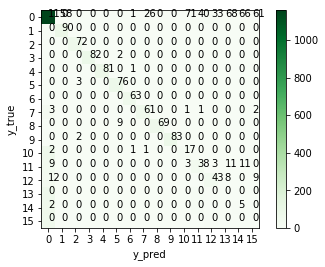

[sklearn_metrics] accuracy:0.8075 precision:0.8075 recall:0.8075 f1:0.8075


In [61]:
# call test function and get reconstructed images
caps_output, data, reconstructions = test(capsule_net, test_loader)